### Парсинг данных и создание датафрейма

In [31]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

#%matplotlib notebook

In [32]:
paths = glob.glob(f"build/*ParticleData_t*.csv")

In [33]:
# Вытаскиваем из первого файла названия столбцов
with open(paths[0], 'r') as f:
    lines = []
    while True:
        line = f.readline()
        if len(line)==0:
            break
        if line[0] != '#':
            break
        lines.append(line)
    title = lines[1].replace('#title ', '')[:-1]                        
    sep = chr(int(lines[2].replace('#separator ', '')[:-1]))            
    vsc_sep = chr(int(lines[3].replace('#vector_separator ', '')[:-1])) 
    columns = [' '.join(i.split(' ')[2:])[:-1] for i in lines[4:]]
    metarows_len = len(lines)

In [34]:
data = pd.DataFrame()
for path in paths:
    item = pd.read_csv(path, skiprows=metarows_len, names=columns)
    data = data.append(item, ignore_index=True)

In [35]:
data

,particle_name,X,Y,Z,vX,vY,vZ,energy
0,gamma,0.924888,-0.017634,-0.002860,-0.685791,-0.322416,-0.033464,0.758538
1,gamma,0.414573,-0.000340,0.248038,-0.965654,-0.310043,0.513565,1.136820
2,e-,-0.999939,0.121901,-0.488423,-2.578320,0.613457,-1.069590,2.392020
3,gamma,-0.023020,0.002273,-0.265610,-1.933180,-0.547565,-0.188970,2.018100
4,gamma,0.980319,0.000528,-0.000016,-0.111745,-0.065780,0.003302,0.129711
...,...,...,...,...,...,...,...,...
101231135,e-,-0.999949,0.017816,-0.506199,-2.389400,0.137726,-1.890310,2.581320
101231136,gamma,-0.961328,0.024620,-0.477120,-0.083062,0.024312,-0.038359,0.094667
101231137,gamma,0.315278,0.060870,-0.403120,-1.464300,0.055400,-1.104800,1.835170
101231138,e-,-0.999996,0.011098,-0.231038,-1.914640,-2.020280,0.929092,2.467530


In [45]:
set(data["particle_name"])

{'e+', 'e-', 'gamma'}

In [46]:
len(data[data["particle_name"]=="e+"])

2992

In [37]:
len(data[data["particle_name"]=="e-"])

37912012

In [38]:
len(data[data["particle_name"]=="gamma"])

63316136

In [49]:
energy = data["energy"].to_numpy()

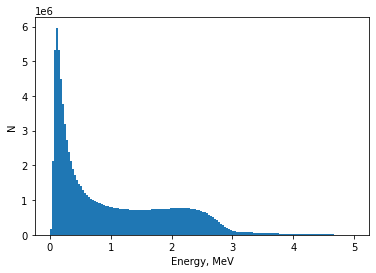

In [52]:
plt.hist(energy, bins=150)
plt.xlabel("Energy, MeV")
plt.ylabel("N")
plt.show()

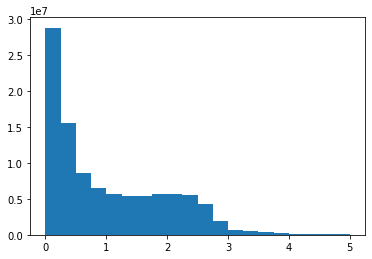

In [41]:
nparticle, energy, _ = plt.hist(energy, bins=20)

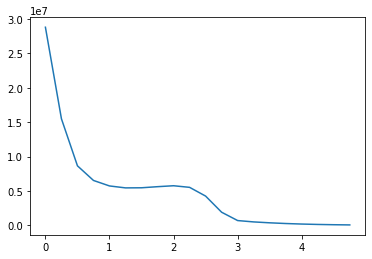

In [42]:
plt.plot(energy[:-1], nparticle)